In [2]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy
import matplotlib as mpl

In [3]:

fileName = 'ac__1__2019-02-11-11-18-30_1'
subjectName = fileName.split('__')[0]

pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\Subjects\Saccades\1DegreeFixationRadius' + '\\' + fileName + '.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df.columns = ['TimeStamp', 'SaccadeAmplitude', 'SaccadeDuration', 'SaccadeVelocity']

In [4]:
df

,TimeStamp,SaccadeAmplitude,SaccadeDuration,SaccadeVelocity
0,2019-02-11 11:18:30.716,1.044617,0.011111,94.015496
1,2019-02-11 11:18:30.722,4.246894,0.011111,382.220418
2,2019-02-11 11:18:32.861,1.454523,0.011111,130.907041
3,2019-02-11 11:18:32.872,2.274111,0.011111,204.670016
4,2019-02-11 11:18:33.294,3.292013,0.011111,296.281202
5,2019-02-11 11:18:33.305,5.334673,0.022222,240.060293
6,2019-02-11 11:18:33.316,8.184507,0.033333,245.535213
7,2019-02-11 11:18:33.327,12.596007,0.033333,377.880213
8,2019-02-11 11:18:33.749,1.055690,0.011111,95.012144
9,2019-02-11 11:18:33.761,8.154843,0.022222,366.967921


In [5]:
plt.plot(df.SaccadeAmplitude, df.SaccadeDuration, 'o')
plt.ylabel('Saccade Duration [in s]')
plt.xlabel('Saccade Amplitude [in deg]')
plt.title(fileName)

Text(0.5, 1.0, 'ac__1__2019-02-11-11-18-30_1')

Text(0.5, 1.0, 'ac__1__2019-02-11-11-18-30_1')

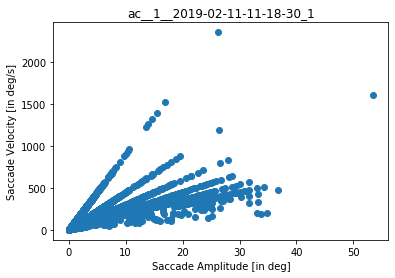

In [7]:
plt.plot(df.SaccadeAmplitude, df.SaccadeVelocity, 'o')
plt.ylabel('Saccade Velocity [in deg/s]')
plt.xlabel('Saccade Amplitude [in deg]')
plt.title(fileName)

In [6]:
fileName = 'ac__1__2019-02-11-11-33-32_2'
subjectName = fileName.split('__')[0]

pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\Subjects\Saccades\2DegreeFixationRadius' + '\\' + fileName + '.xlsx'


df2 = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df2.columns = ['TimeStamp', 'SaccadeAmplitude', 'SaccadeDuration', 'SaccadeVelocity']

In [7]:
plt.plot(df2.SaccadeAmplitude, df2.SaccadeDuration, 'o')
plt.ylabel('Saccade Duration [in s]')
plt.xlabel('Saccade Amplitude [in deg]')
plt.title(fileName)

Text(0.5, 1, 'ac__1__2019-02-11-11-33-32_2')

In [8]:
plt.plot(df2.SaccadeAmplitude, df2.SaccadeVelocity, 'o')
plt.ylabel('Saccade Velocity [in deg/s]')
plt.xlabel('Saccade Amplitude [in deg]')
plt.title(fileName)

Text(0.5, 1.0, 'ac__1__2019-02-11-11-33-32_2')